In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

digits = load_digits()

In [38]:
print("Digits shape", digits.data.shape)
print("Digits target shape", digits.target.shape)

Digits shape (1797, 64)
Digits target shape (1797,)


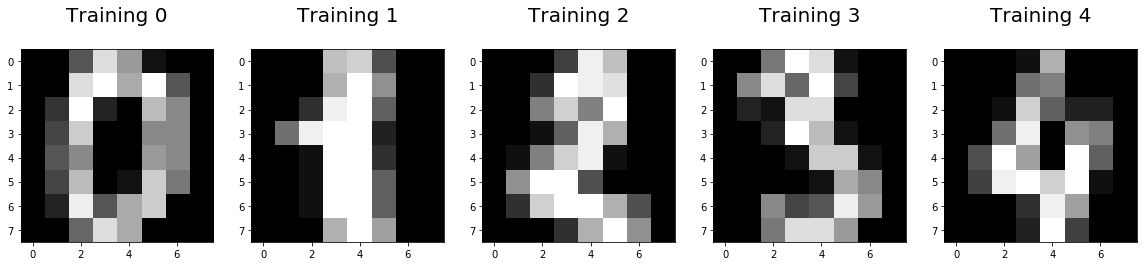

In [39]:
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training %i\n" % label, fontsize=20)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [41]:
print(x_train.shape)

(1383, 64)


In [42]:
print(x_test.shape)

(414, 64)


In [43]:
print(y_train.shape)

(1383,)


In [44]:
print(y_test.shape)

(414,)


# Build Logistic Regression Classifier

In [69]:
from sklearn.linear_model import LogisticRegression
#build the classifier
log = LogisticRegression()

In [70]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
print(log.predict(x_test))

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 1 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 8 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 1 4 8 7 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 7 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 8 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 0 0 4 0 0 9 0 6 5 8 8
 3 7 8 2 0 8 2 7 3 0 2 1 5 2 7 0 6 9 3 3 1 3 5 2 8 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 7 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]


In [48]:
predByLog = log.predict(x_test)
print(predByLog[0:5])

[4 0 9 1 8]


In [49]:
print(log.predict(x_test[0].reshape(1, -1)))

[4]


In [50]:
scoreForLog = log.score(x_test, y_test)
print(scoreForLog)

0.9420289855072463


In [52]:
cmForLog = metrics.confusion_matrix(y_test, predByLog)
print(cmForLog)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


In [67]:
accuracyForLog = metrics.accuracy_score(y_test, predByLog)
print(accuracyForLog)

0.9420289855072463


Text(0.5,1,'Accuracy 0.9420289855072463')

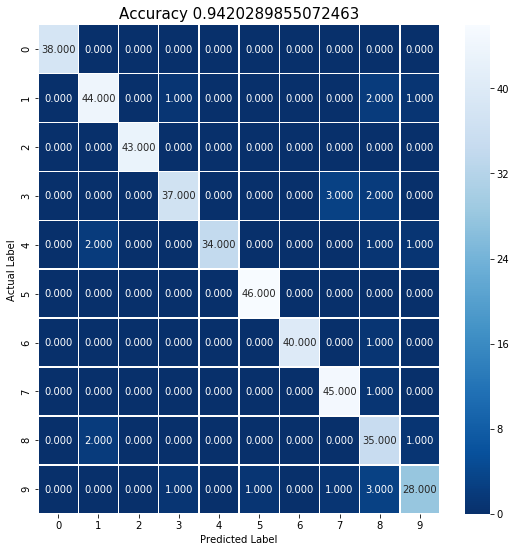

In [53]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForLog, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForLog)
plt.title(title, size=15)

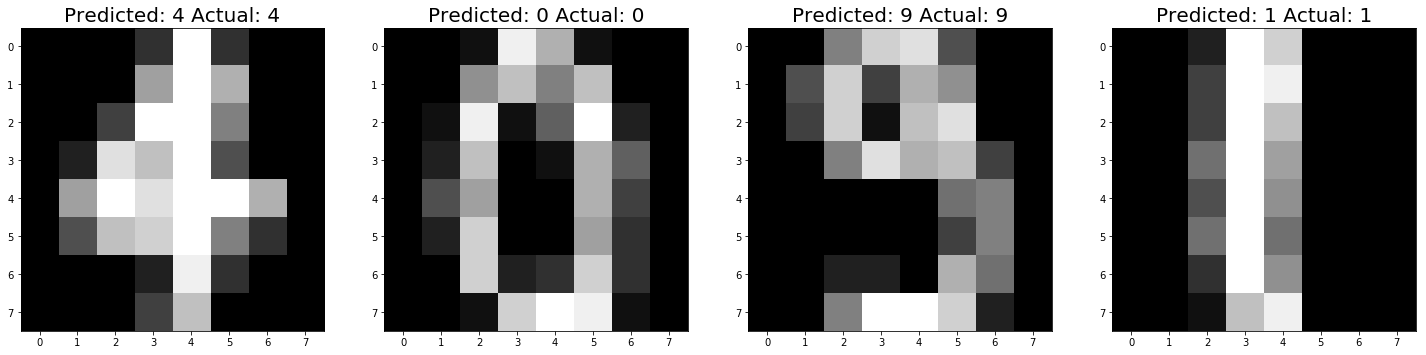

In [54]:
index = 0
classifierIndex = []

for predict, actual in zip(predByLog, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predByLog[correct], y_test[correct]), fontsize=20)

# Build svm classifier

In [55]:
from sklearn import svm
# build the classifier
svmclassifier = svm.SVC(gamma=0.001)

In [56]:
svmclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
print(svmclassifier.predict(x_test))

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 8 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 8 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 0 0 4 0 0 4 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]


In [58]:
predBySvm = svmclassifier.predict(x_test)
print(predBySvm[0:5])

[4 0 9 1 8]


In [59]:
print(svmclassifier.predict(x_test[0].reshape(1, -1)))

[4]


In [61]:
scoreForSvm = svmclassifier.score(x_test, y_test)
print(scoreForSvm)

0.9830917874396136


In [62]:
cmForSvm = metrics.confusion_matrix(y_test, predBySvm)
print(cmForSvm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  3  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  0  0  0  0  0  1 33]]


In [68]:
accuracyForSvm = metrics.accuracy_score(y_test, predBySvm)
print(accuracyForSvm)

0.9830917874396136


Text(0.5,1,'Accuracy 0.9830917874396136')

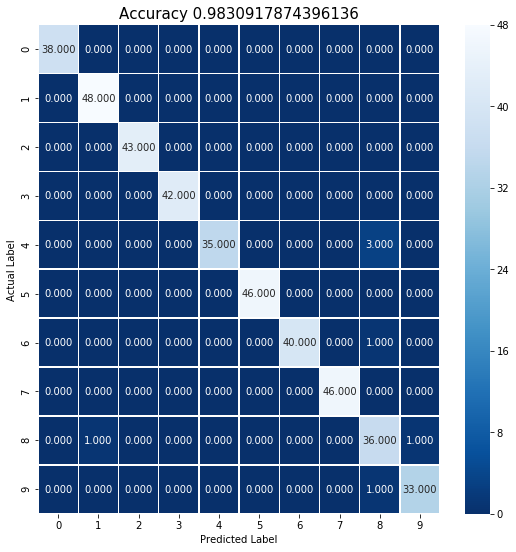

In [63]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForSvm, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForSvm)
plt.title(title, size=15)

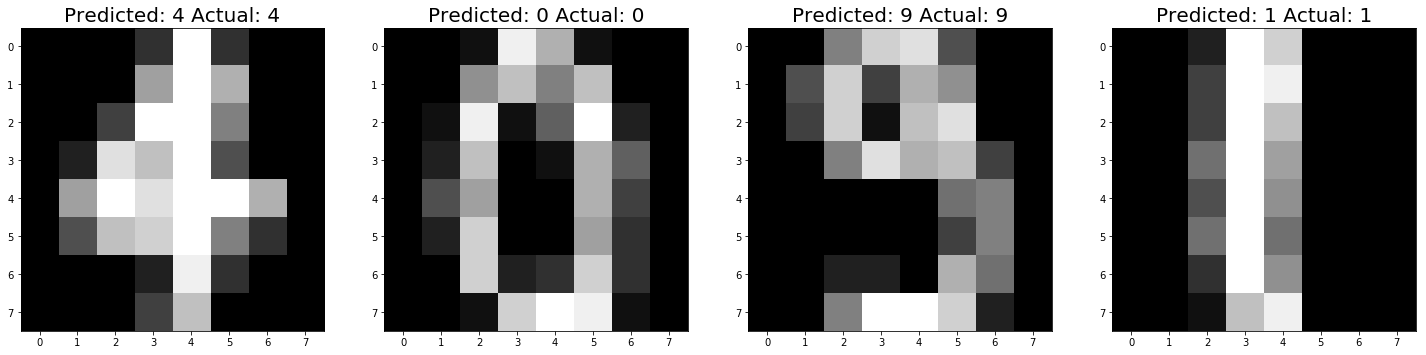

In [64]:
index = 0
classifierIndex = []

for predict, actual in zip(predBySvm, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predBySvm[correct], y_test[correct]), fontsize=20)

# Build KNN classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
#build the classifier
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)

In [71]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
print(knn.predict(x_test))

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 5 8 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 7 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 7 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]


In [74]:
predByKnn = knn.predict(x_test)
print(predByKnn[0:5])

[4 0 9 1 8]


In [75]:
print(knn.predict(x_test[0].reshape(1, -1)))

[4]


In [76]:
scoreForKnn = knn.score(x_test, y_test)
print(scoreForKnn)

0.9806763285024155


In [77]:
cmForKnn = metrics.confusion_matrix(y_test, predByKnn)
print(cmForKnn)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  1  0  0]
 [ 0  0  0 41  0  0  0  1  0  0]
 [ 0  0  0  0 36  0  0  1  1  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  1  0  1  0 32]]


In [78]:
accuracyForKnn = metrics.accuracy_score(y_test, predByKnn)
print(accuracyForKnn)

0.9806763285024155


Text(0.5,1,'Accuracy 0.9806763285024155')

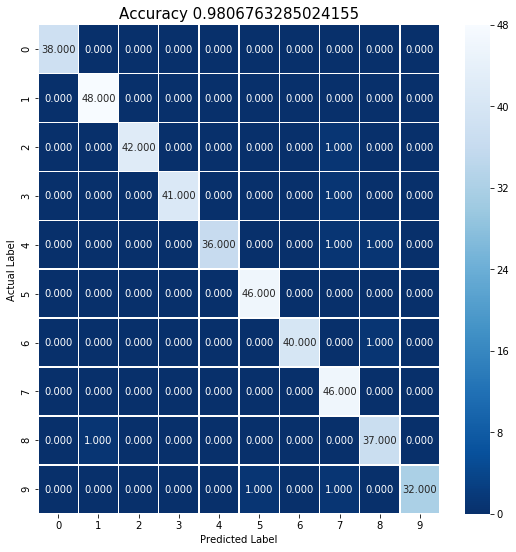

In [79]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForKnn, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForKnn)
plt.title(title, size=15)

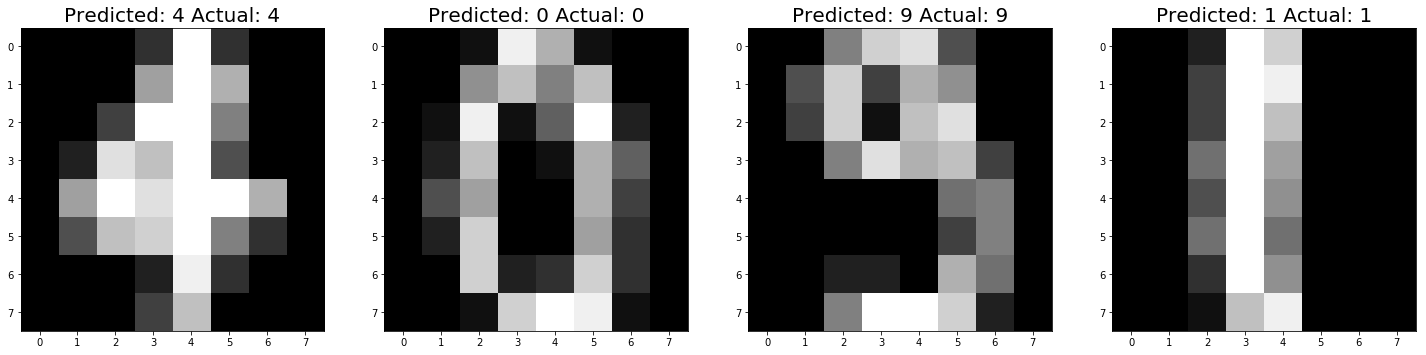

In [80]:
index = 0
classifierIndex = []

for predict, actual in zip(predByKnn, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predByKnn[correct], y_test[correct]), fontsize=20)